# VGG16 Assignment

## Dataset download
run the following code to download the Cifar-10 dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Data generator
Datasets are often too big for our computer.
Therefore we need a generator to load small parts of our dataset to reduce memory cost.

In [ ]:
def data_generator(input_data, labels, batch_size):

    while True:
        for i in range(0, len(input_data), batch_size):
            batch_x = input_data[i:i+batch_size, :, :, :]
            batch_y = labels[i:i+batch_size, :]

            yield batch_x, batch_y

## The VGG-16 model

The VGG-16 model is a very famous model when classifying images.
it's consisted with 5 convolution blocks and 3 fully connected layers.
Refer the next figure for the model structure

![](./img/vgg16_figure.png)

In [ ]:
# You can import all the things you need

import tensorflow as tf

class Vgg16:

    def __init__(self, input_shape=(0, 0), num_classes=10, batch_size=64, epochs=20):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.batch_size = batch_size
        self.epochs = epochs

    def model(self):

        ############################################
        #              YOUR CODE HERE              #
        ############################################

        pass

        ############################################
        #            YOUR CODE ENDS HERE           #
        ############################################

    def fit(self):
        model = self.model()

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

        model.fit(data_generator(x_train, y_train, batch_size=self.batch_size), epochs=self.epochs,
                  verbose=1, steps_per_epoch=y_train.shape[0]//self.batch_size)

        model.save("vgg16.h5")

## Training our model

Run the following code to train the network.
The weights are saved in vgg16.h5

In [ ]:
vgg16 = Vgg16(input_shape=(32,32,3))
vgg16.fit()

## Model evaluation
Load the vgg16.h5 file to evaluate our network.

deer


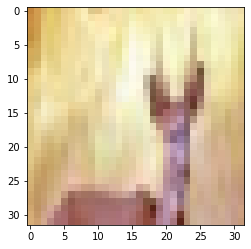

In [9]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
import random
import numpy as np
import matplotlib.pyplot as plt

cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

model = keras.models.load_model("vgg16.h5")
test_image = x_test[random.randint(0,x_test.shape[0])]
plt.imshow(test_image)
print(cifar10_labels[np.argmax(model.predict(test_image.reshape((1,32,32,3))))])
plt.show()